In [1]:
%cd ..

/home/ubuntu/dev/edge/py-edge-eval


In [2]:
import os

# imports
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
# %matplotlib widget

In [4]:
ROOT = os.path.join('data', 'cityscapes')
gtFine = os.path.join(ROOT, 'gtFine')
gtEval = os.path.join(ROOT, 'gtEval')

# extensions:
img_ext = "gtFine_color.png"
inst_ext = "gtFine_instanceIds.png"
label_ext = "gtFine_labelIds.png"
poly_ext = "gtFine_polygons.json"
edge_ext = "gtProc_isedge.png"  # NOTE: instance sensitive
seg_ext = "gtFine_labelTrainIds.png"  # NOTE: instance sensitive

In [5]:
# sampe:
split = 'val'
city = "frankfurt"
frameid = "000000_000576"

img_path = os.path.join(gtFine, split, city, f"{city}_{frameid}_{img_ext}")
assert os.path.exists(img_path)
label_path = os.path.join(gtEval, split, city, f"{city}_{frameid}_{seg_ext}")
edge_path = os.path.join(gtEval, split, city, f"{city}_{frameid}_{edge_ext}")
assert os.path.exists(edge_path) and os.path.exists(label_path)

In [6]:
from pyEdgeEval.datasets.cityscapes.edge_encoding import rgb_decoding

In [13]:
scale = 0.5

(19, 512, 1024) (512, 1024)


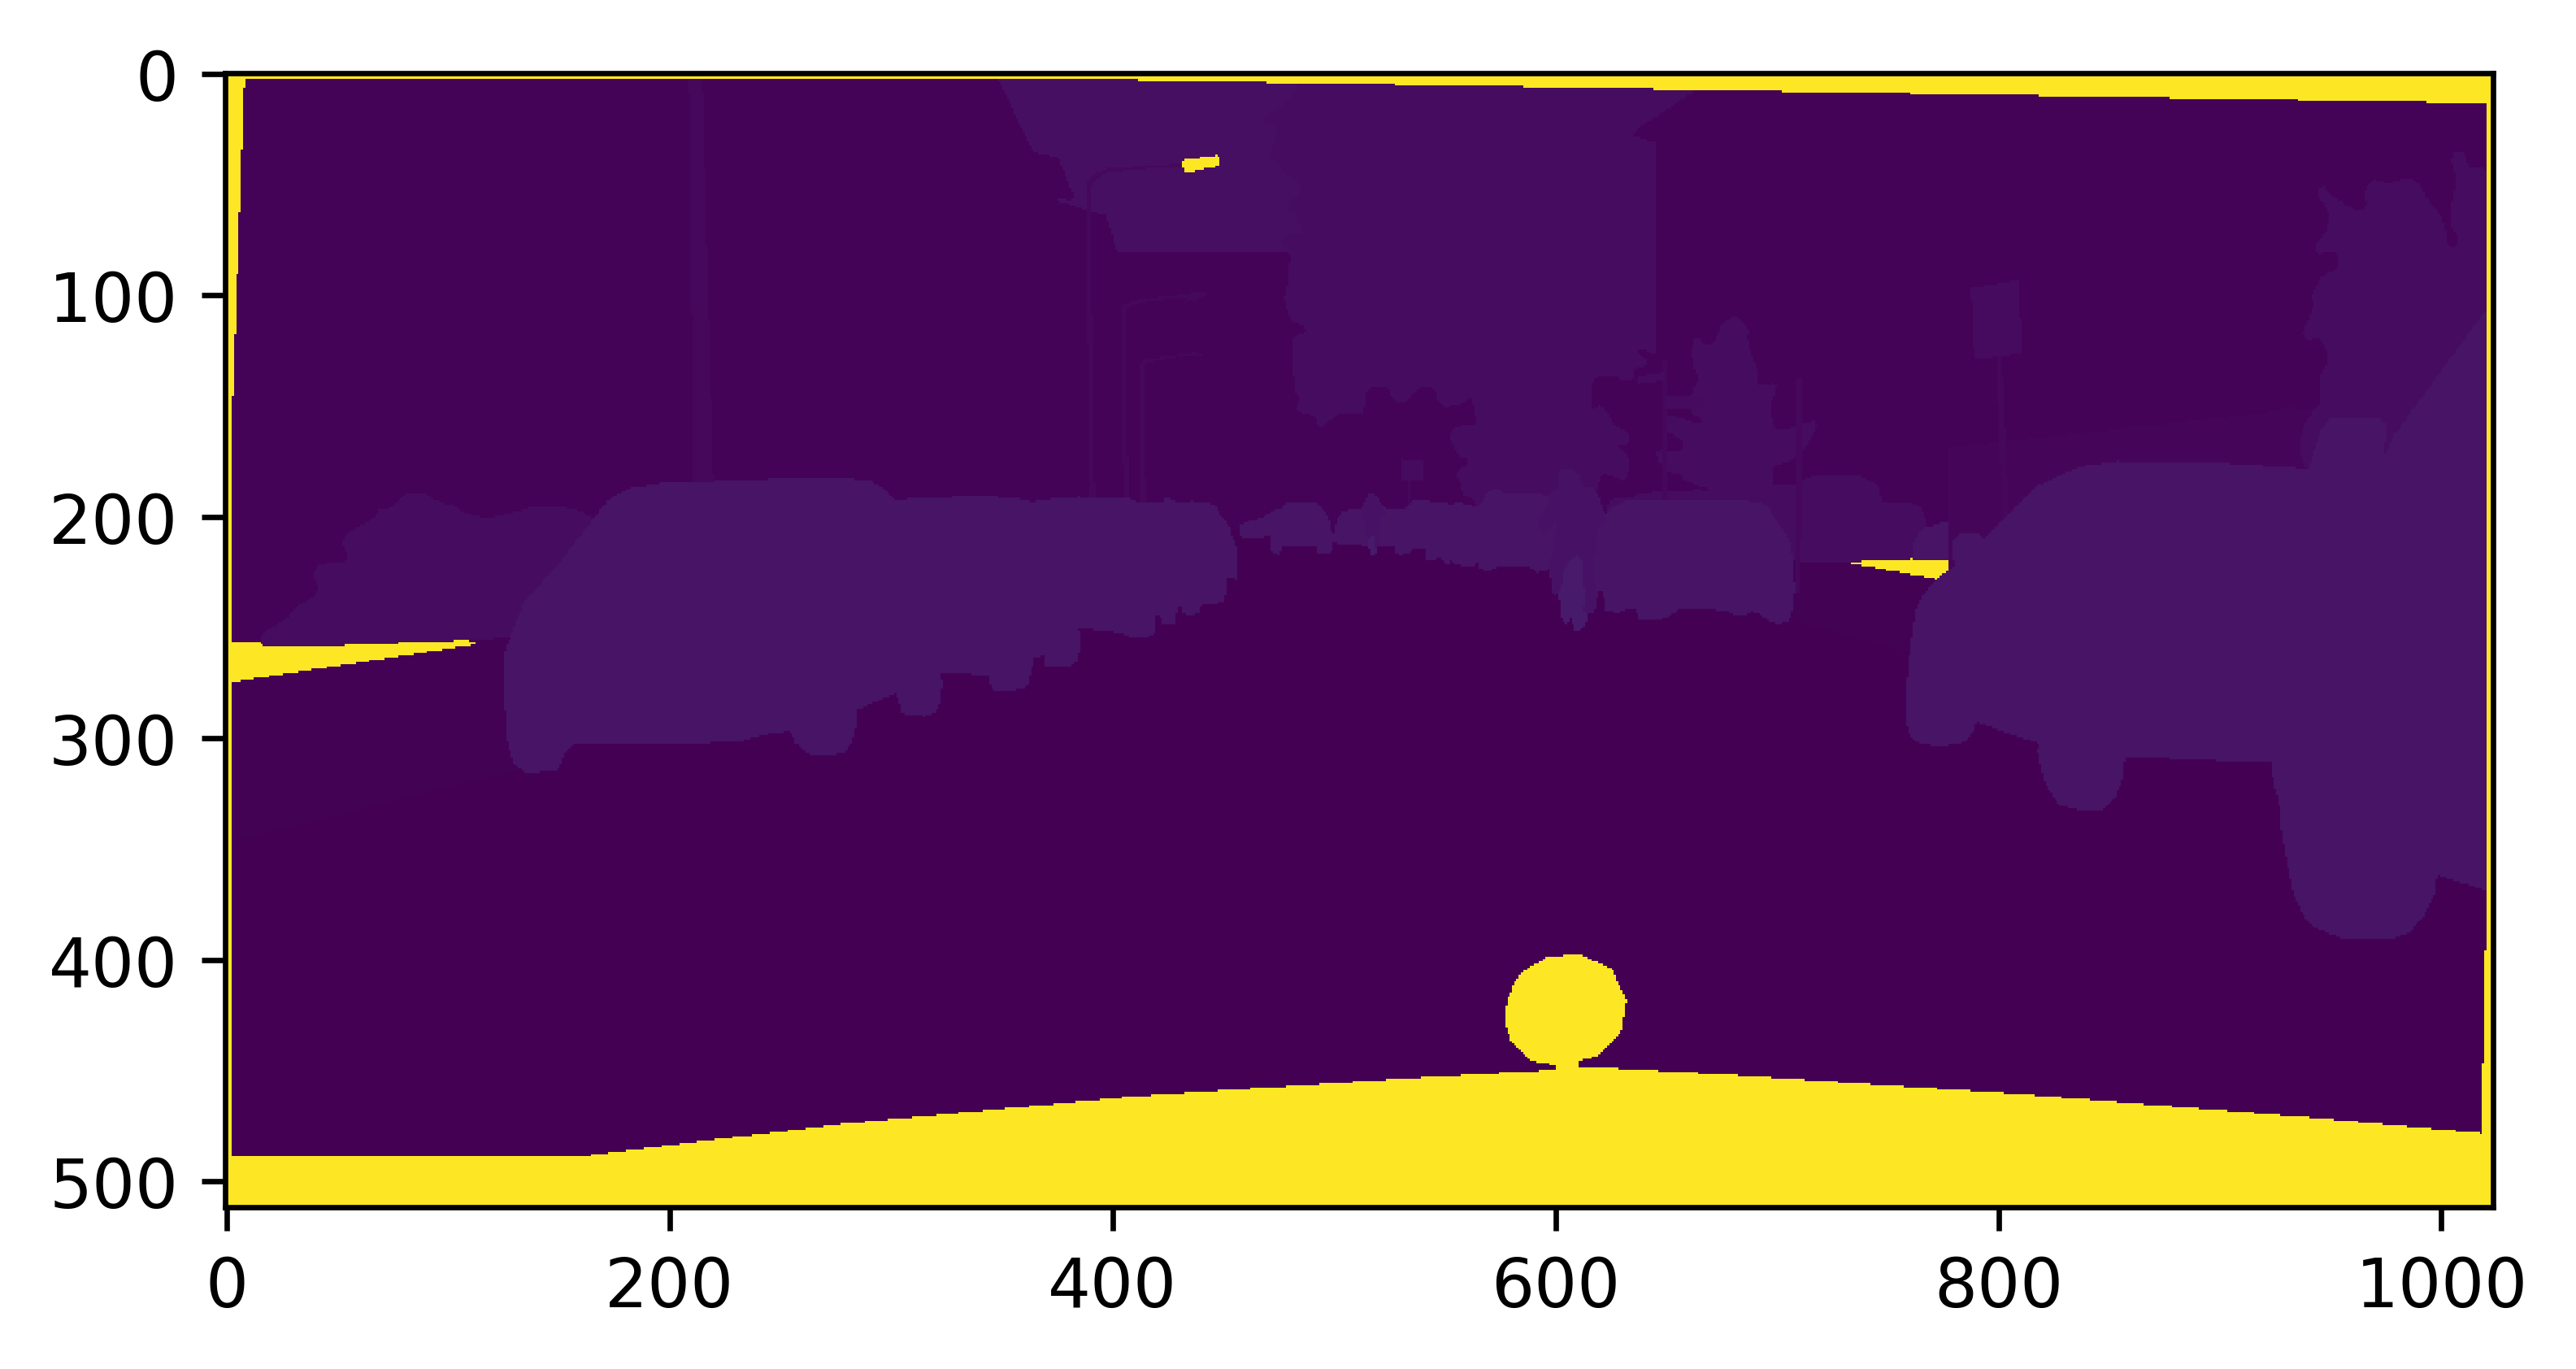

In [15]:
mask = Image.open(label_path)
_mask = np.array(mask)
(h, w) = _mask.shape
oh, ow = int(h * scale + 0.5), int(w * scale + 0.5)
mask = mask.resize((ow, oh), Image.NEAREST)
mask = np.array(mask)

edge = rgb_decoding(
    edge_path=edge_path,
    num_trainIds=19,
    scale=0.5,
    is_png=True,
)

print(edge.shape, mask.shape)

plt.imshow(mask, interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()

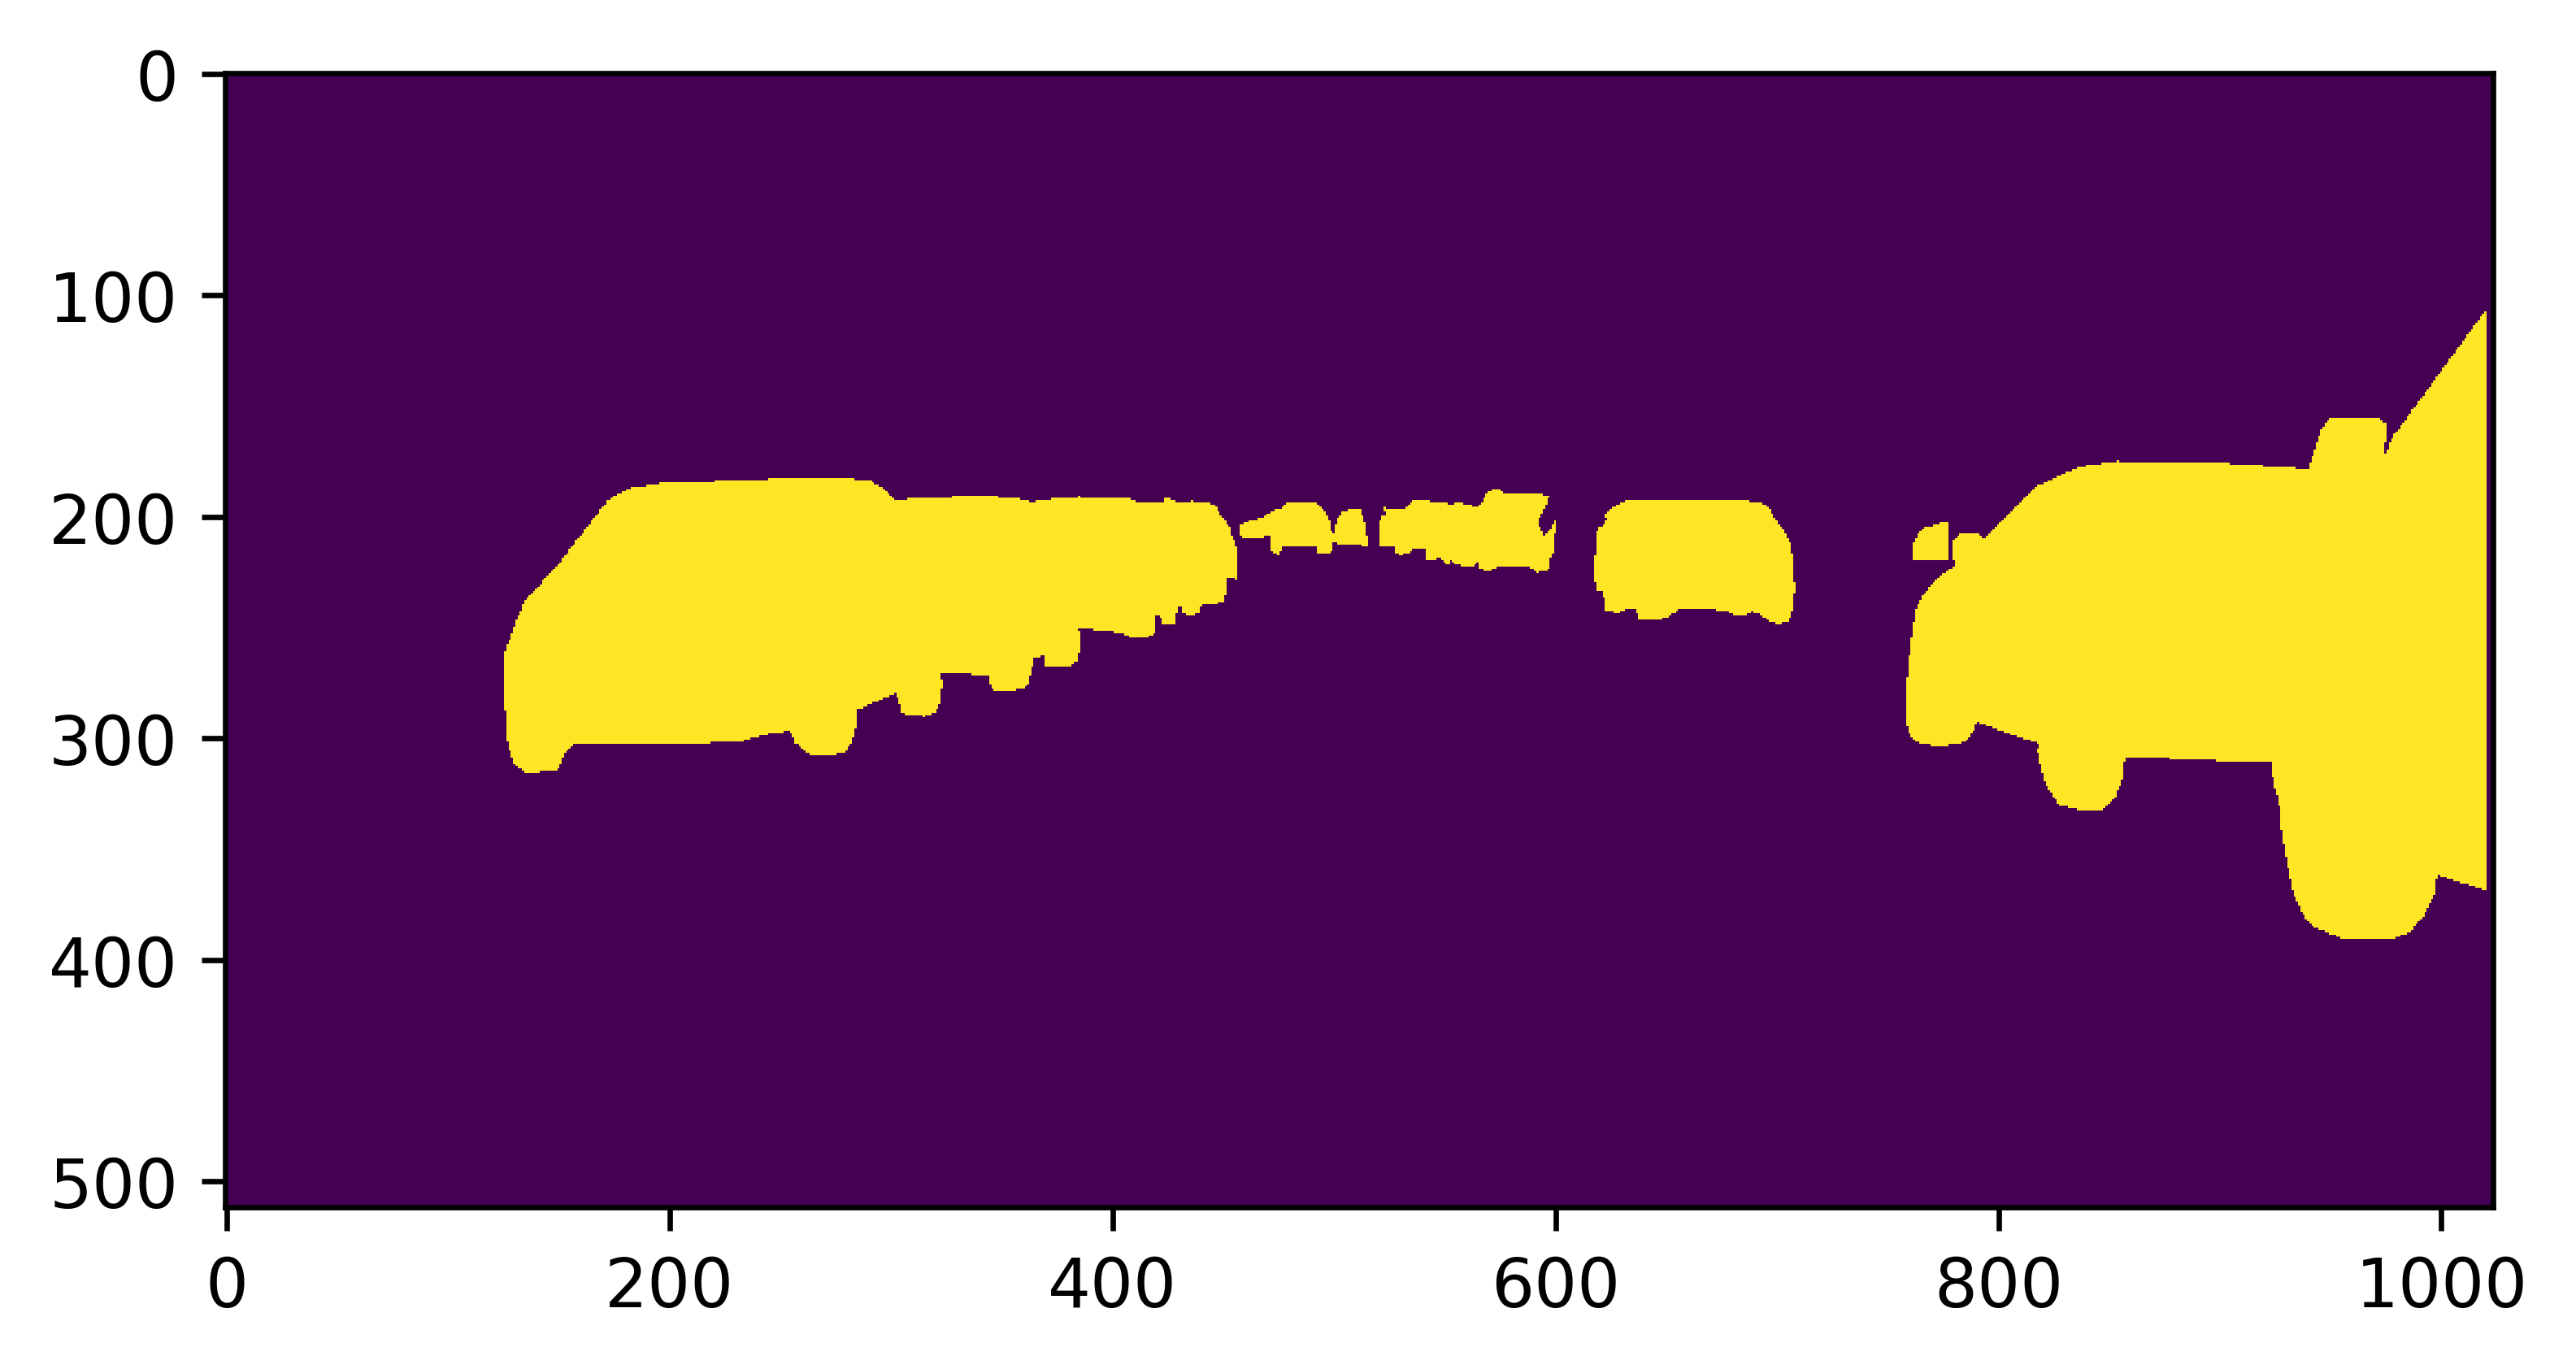

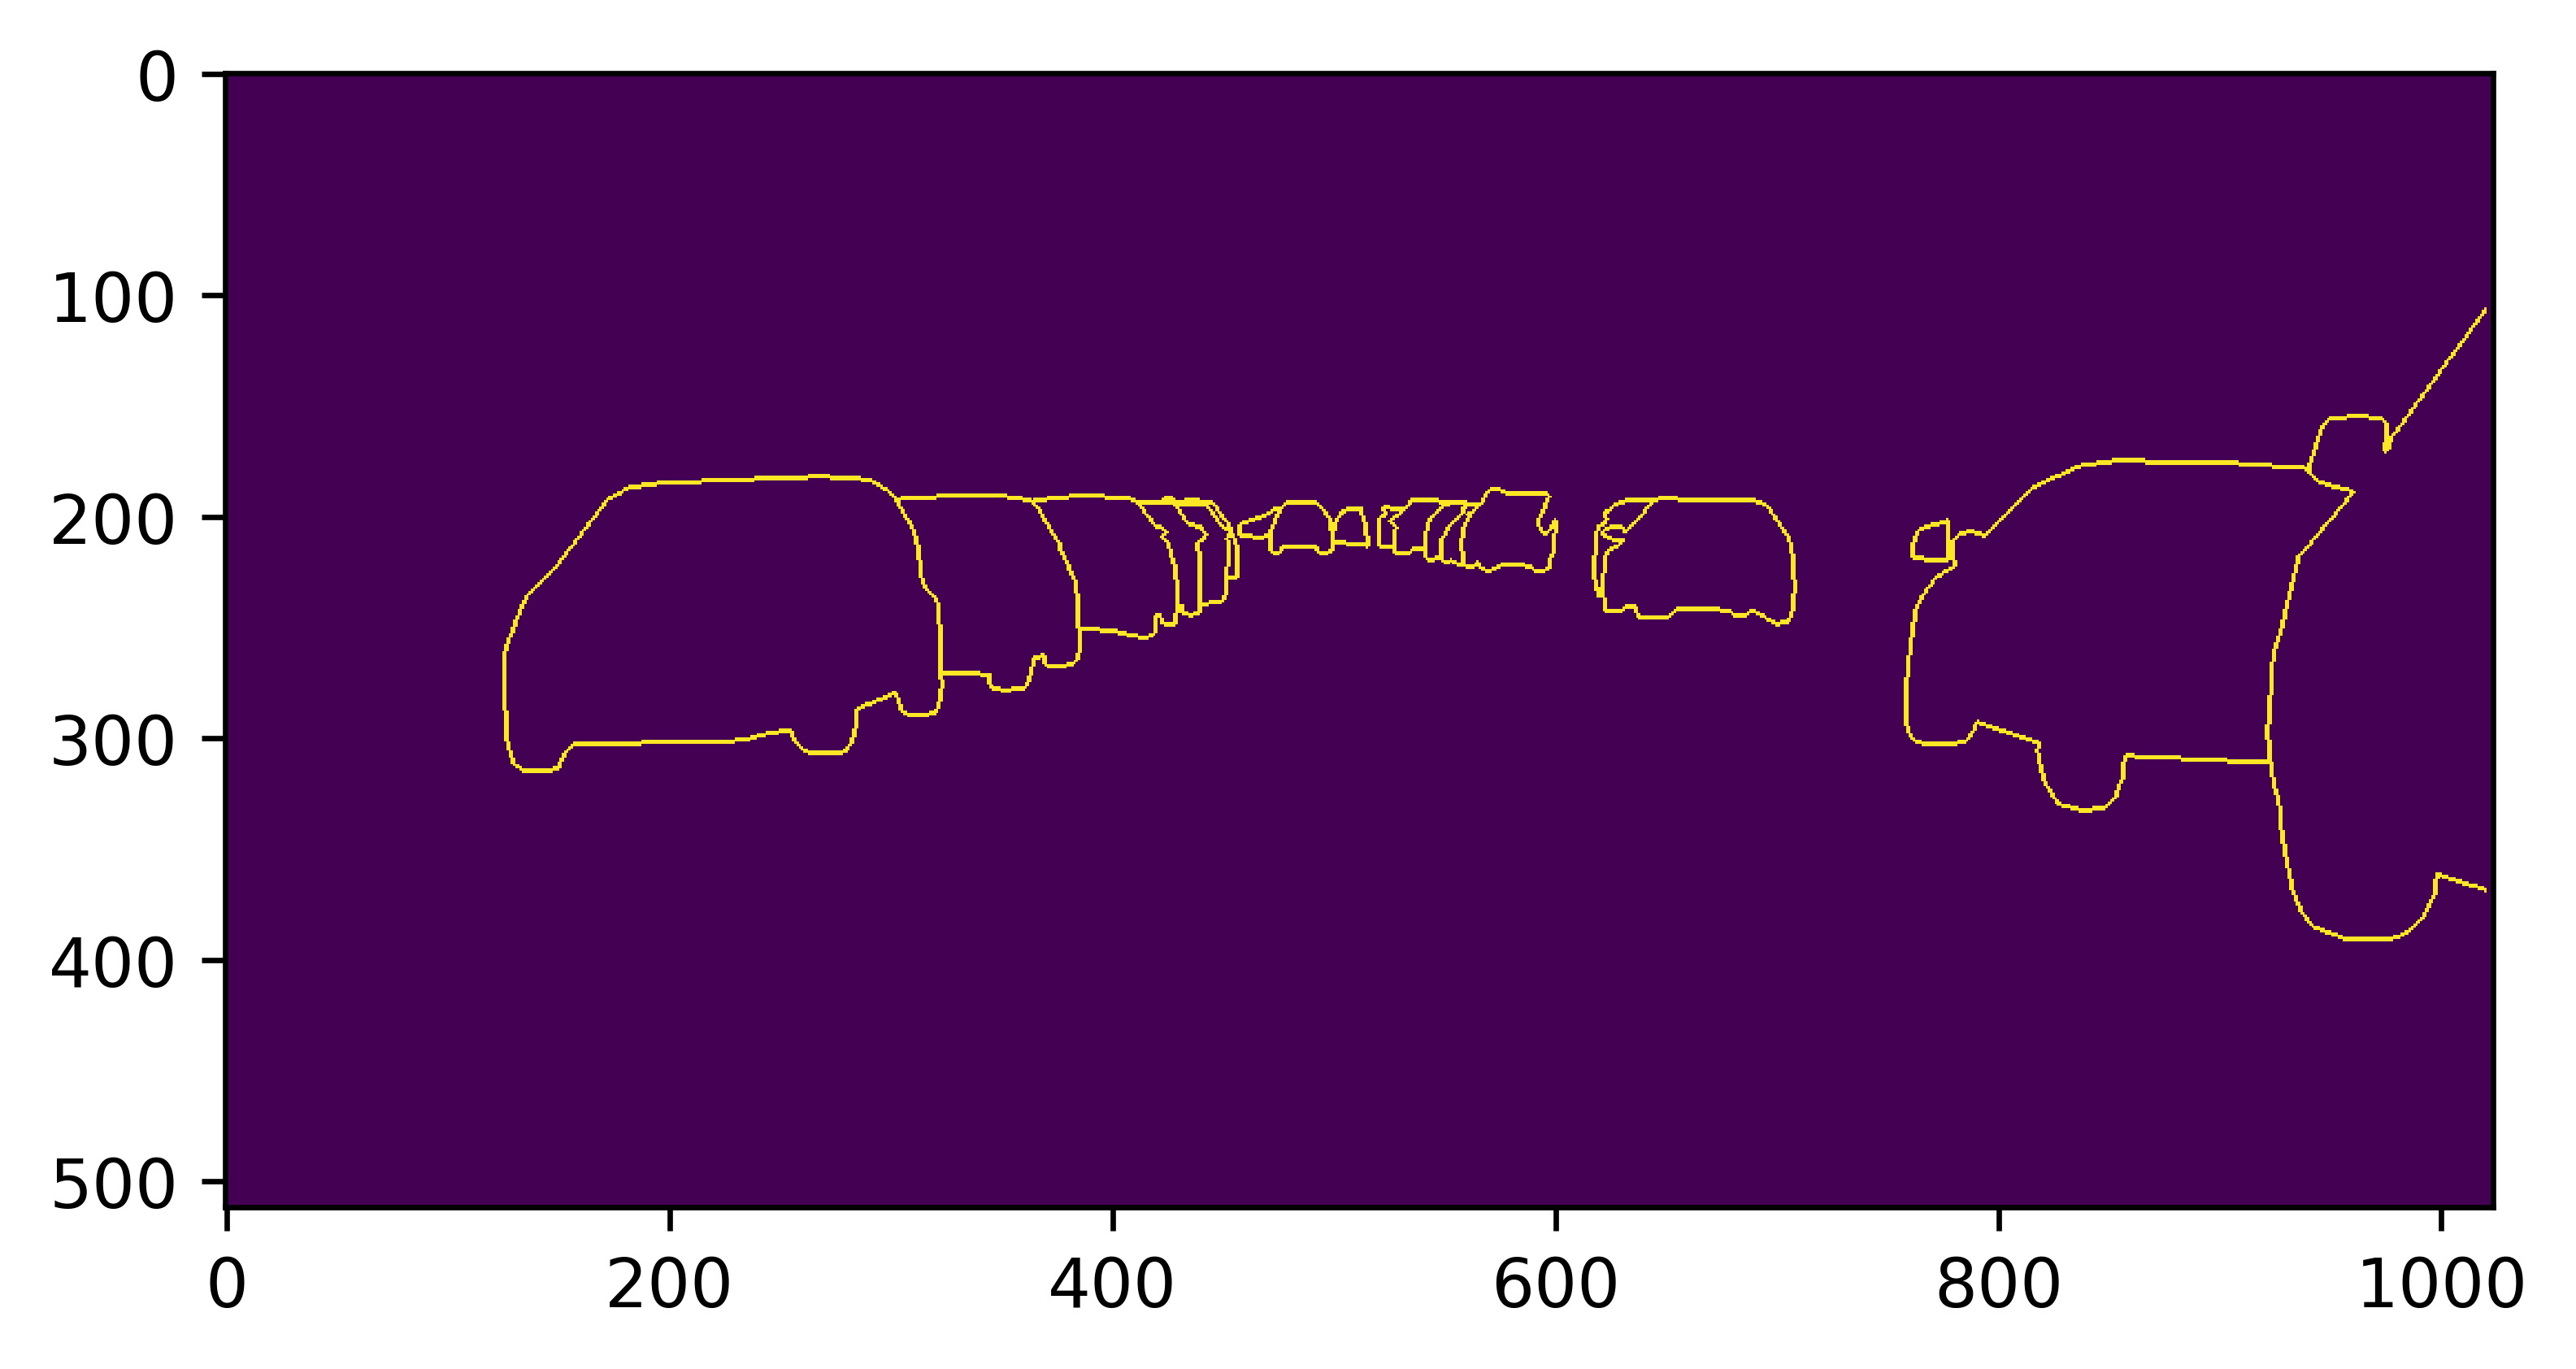

In [16]:
cat = 13

plt.imshow(mask == cat, interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()

plt.imshow(edge[cat], interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()